# Problem Description

![Caption](files/img/ContinuousNet.png)


The network defined above has the corresponding continuous random variables.
A is the exponential distribution, B is the uniform distribution, C is normal distribution with the returned value from A and B as the standard deviation and mu respectively, D is a normal distribution with the value from C as the mu, and E is a normal distribution with the value from C as the standard deviation.  

In [2]:
import numpy, pymc3, theano

nobserve = 1000

obsdata = theano.shared(numpy.zeros(nobserve))

with pymc3.Model() as model:
    a = pymc3.Exponential('a', lam=2.)
    b = pymc3.Uniform('b', lower=0, upper=4)
    c = pymc3.Normal('c', mu=b, sd=a)
    d = pymc3.Normal('d', mu=c, sd=2)
    e = pymc3.Normal('e', mu=0, sd=c)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\users\rahul\appdata\local\programs\python\python35\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\users\rahul\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\users\rahul\appdata\local\programs\python\python35\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [e, d, c, b_interval__, a_log__]
There were 26 divergences after tuning. Increase `target_accept` or reparameterize.
Only 200 samples in chain.
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.
Only 200 samples in chain.
There were 43 divergences after tuning. Increase `target_accept` or reparameterize.
Only 200 samples in chain.
There were 43 divergences after tuning. Increase `target_accept` or reparameterize.
Only 200 samples in chain.
The acceptance probability does not match the target. It is 0.6970350846977783, but s

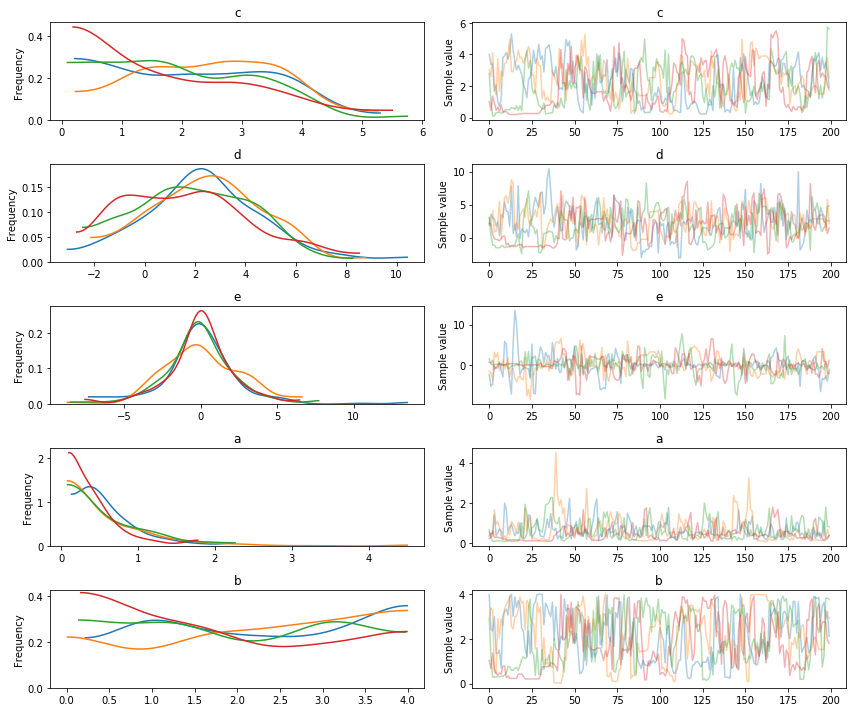

In [39]:
%matplotlib inline

nTrials = 200

with model:
    trace = pymc3.sample(nTrials)
    pymc3.traceplot(trace)


Here, we modify the function created before to check for values within a range:

In [4]:
# Function created in Wet Grass notebook
# Renamed variables for my own understanding
def calcCondProb(trace, event, cond):
    for k, v in cond.items():
        # If the value for the sample is below our upper bound, add it to the trace
        trace = [sample for sample in trace if sample[k] < v]
    # Get number of samples that match the condition
    numSamples = len(trace)
    for k, v in event.items():
        # If the values of the event are met, find those samples and add it to the trace
        trace = [sample for sample in trace if sample[k] < v]
    return len(trace)/numSamples

In [37]:
print('P ( A < 2 | E < 1)', calcCondProb(trace, {'a': 2}, {'e': 1}))
print('P ( A > 2 | D < 0)', (1 - calcCondProb(trace, {'a': 2}, {'d': 0})))
print('P ( A < 2 | D < 0)', (calcCondProb(trace, {'a': 2}, {'d': 0})))
print('P ( A < 0 | D < 0, E < 2)', (calcCondProb(trace, {'a': 0}, {'d': 0, 'e' : 5})))

P ( A < 2 | E < 1) 0.9723600283486888
P ( A > 2 | D < 0) 0.020000000000000018
P ( A < 2 | D < 0) 0.98
P ( A < 0 | D < 0, E < 2) 0.0
